# EDA Project: Natura Consulting

This is Natura, a consulting firm that focuses on environmental management. Our company wants to launch a marketing campaign to reduce shark attacks. In order to launch an appropiate campaign, we need to know where to launch it and ensure a proper marketing segmentation.

Some of the questions that we need to answer to create an effective campaign are:

- When should they launch their campaign? Which quarters of the year could be good?
- Should we segment it by gender or age?
- Which activities were victims primarily doing prior to the attack?
- Which quarters do shark attacks happen more frequently?
- Were majority of the attacks fatal?

Columns we will be focusing on: Country, Area, Year, Date, Age, Activity, Type.

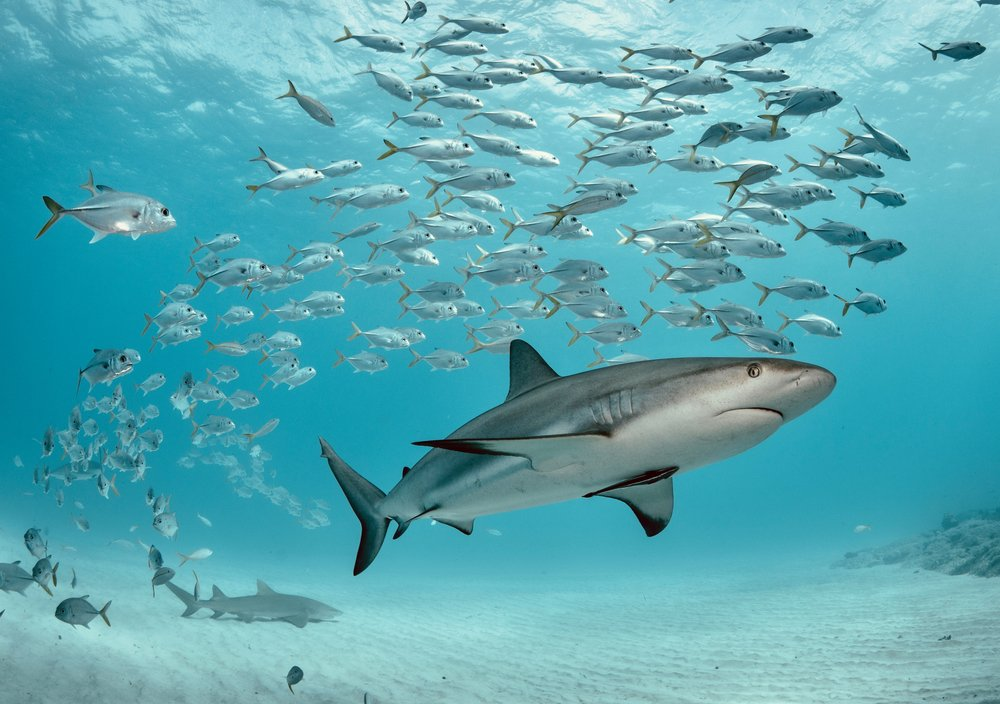




In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
sharks=pd.read_csv("data/attacks.csv", encoding='latin1')
sharks



Case Number         Date    Year        Type    Country  \
0      2018.06.25  25-Jun-2018  2018.0     Boating        USA   
1      2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA   
2      2018.06.09  09-Jun-2018  2018.0     Invalid        USA   
3      2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA   
4      2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO   
...           ...          ...     ...         ...        ...   
25718         NaN          NaN     NaN         NaN        NaN   
25719         NaN          NaN     NaN         NaN        NaN   
25720         NaN          NaN     NaN         NaN        NaN   
25721         NaN          NaN     NaN         NaN        NaN   
25722          xx          NaN     NaN         NaN        NaN   

                  Area                        Location     Activity  \
0           California     Oceanside, San Diego County     Paddling   
1              Georgia  St. Simon Island, Glynn County     Standing   
2               Hawaii                    Habush, Oahu      Surfing   
3      New South Wales              Arrawarra Headland      Surfing   
4               Colima                        La Ticla  Free diving   
...                ...                             ...          ...   
25718              NaN                             NaN          NaN   
25719              NaN                             NaN          NaN   
25720              NaN                             NaN          NaN   
25721              NaN                             NaN          NaN   
25722              NaN                             NaN          NaN   

                  Name Sex   Age  \
0          Julie Wolfe    F   57   
1      Adyson McNeely     F   11   
2          John Denges    M   48   
3                 male    M  NaN   
4       Gustavo Ramos     M  NaN   
...                ...  ...  ...   
25718              NaN  NaN  NaN   
25719              NaN  NaN  NaN   
25720              NaN  NaN  NaN   
25721              NaN  NaN  NaN   
25722              NaN  NaN  NaN   

                                                  Injury Fatal (Y/N)  \
0      No injury to occupant, outrigger canoe and pad...           N   
1                             Minor injury to left thigh           N   
2           Injury to left lower leg from surfboard skeg           N   
3                              Minor injury to lower leg           N   
4      Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                  ...         ...   
25718                                                NaN         NaN   
25719                                                NaN         NaN   
25720                                                NaN         NaN   
25721                                                NaN         NaN   
25722                                                NaN         NaN   

                Time         Species           Investigator or Source  \
0              18h00      White shark                R. Collier, GSAF   
1      14h00  -15h00              NaN  K.McMurray, TrackingSharks.com   
2              07h45              NaN  K.McMurray, TrackingSharks.com   
3                NaN        2 m shark                  B. Myatt, GSAF   
4                NaN  Tiger shark, 3m                       A .Kipper   
...              ...              ...                             ...   
25718            NaN              NaN                             NaN   
25719            NaN              NaN                             NaN   
25720            NaN              NaN                             NaN   
25721            NaN              NaN                             NaN   
25722            NaN              NaN                             NaN   

                            pdf  \
0          2018.06.25-Wolfe.pdf   
1        2018.06.18-McNeely.pdf   
2         2018.06.09-Denges.pdf   
3      2018.06.08-Arrawarra.pdf   
4          2018.06.04-

In [2]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

# 1. Exploratory Analysis

In [3]:
sharks.shape
#there are 25723 rows and 24 columns

(25723, 24)

In [4]:

sharks.Country.value_counts()


USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: Country, Length: 212, dtype: int64

In [5]:
sharks.size

617352

In [6]:
sharks.dtypes
# According to dtypes all columns except for year and original order are categorical. 
# However, all of them are actually categorical because there is nothing that has actually been measured

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [7]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
sharks. isna(). sum(). sum() 
# there are in total 488276 null values in the dataframe. Damn!

488276

In [9]:
sharks.describe()
# this only includes the 2 columns that can kind of be quantified.. 
# We can see that the count of entries for 'year' corresponds to the non-values value above.
# We can also see that most of the data (>75%) recorded, was recorded after 1942.
# I also noticed that the minimum year recorded is "0" which seems to be an oulier. We will analyze this further later


Year  original order
count  6300.000000     6309.000000
mean   1927.272381     3155.999683
std     281.116308     1821.396206
min       0.000000        2.000000
25%    1942.000000     1579.000000
50%    1977.000000     3156.000000
75%    2005.000000     4733.000000
max    2018.000000     6310.000000

In [10]:
sharks.head()

Case Number         Date    Year        Type    Country             Area  \
0  2018.06.25  25-Jun-2018  2018.0     Boating        USA       California   
1  2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA          Georgia   
2  2018.06.09  09-Jun-2018  2018.0     Invalid        USA           Hawaii   
3  2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA  New South Wales   
4  2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO           Colima   

                         Location     Activity             Name Sex   Age  \
0     Oceanside, San Diego County     Paddling      Julie Wolfe    F   57   
1  St. Simon Island, Glynn County     Standing  Adyson McNeely     F   11   
2                    Habush, Oahu      Surfing      John Denges    M   48   
3              Arrawarra Headland      Surfing             male    M  NaN   
4                        La Ticla  Free diving   Gustavo Ramos     M  NaN   

                                              Injury Fatal (Y/N)  \
0  No injury to occupant, outrigger canoe and pad...           N   
1                         Minor injury to left thigh           N   
2       Injury to left lower leg from surfboard skeg           N   
3                          Minor injury to lower leg           N   
4  Lacerations to leg & hand shark PROVOKED INCIDENT           N   

            Time         Species           Investigator or Source  \
0          18h00      White shark                R. Collier, GSAF   
1  14h00  -15h00              NaN  K.McMurray, TrackingSharks.com   
2          07h45              NaN  K.McMurray, TrackingSharks.com   
3            NaN        2 m shark                  B. Myatt, GSAF   
4            NaN  Tiger shark, 3m                       A .Kipper   

                        pdf  \
0      2018.06.25-Wolfe.pdf   
1    2018.06.18-McNeely.pdf   
2     2018.06.09-Denges.pdf   
3  2018.06.08-Arrawarra.pdf   
4      2018.06.04-Ramos.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href Case Number.1  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
1  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.18   
2  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.09   
3  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.08   
4  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.04   

  Case Number.2  original order Unnamed: 22 Unnamed: 23  
0    2018.06.25          6303.0         NaN         NaN  
1    2018.06.18          6302.0         NaN         NaN  
2    2018.06.09          6301.0         NaN         NaN  
3    2018.06.08          6300.0         NaN         NaN  
4    2018.06.04          6299.0         NaN         NaN

In [11]:
sharks.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [12]:
sharks.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

# 2. Transformation & Cleaning

In [13]:
# I am going to start by dropping columns that I don't need
sharks.drop(columns=["Investigator or Source","Case Number","pdf", "href formula", "href", "Case Number.1", "Case Number.2", "original order", "Unnamed: 22", "Unnamed: 23"], axis=1, inplace=True)

In [14]:
sharks

Date    Year        Type    Country             Area  \
0      25-Jun-2018  2018.0     Boating        USA       California   
1      18-Jun-2018  2018.0  Unprovoked        USA          Georgia   
2      09-Jun-2018  2018.0     Invalid        USA           Hawaii   
3      08-Jun-2018  2018.0  Unprovoked  AUSTRALIA  New South Wales   
4      04-Jun-2018  2018.0    Provoked     MEXICO           Colima   
...            ...     ...         ...        ...              ...   
25718          NaN     NaN         NaN        NaN              NaN   
25719          NaN     NaN         NaN        NaN              NaN   
25720          NaN     NaN         NaN        NaN              NaN   
25721          NaN     NaN         NaN        NaN              NaN   
25722          NaN     NaN         NaN        NaN              NaN   

                             Location     Activity             Name Sex   Age  \
0         Oceanside, San Diego County     Paddling      Julie Wolfe    F   57   
1      St. Simon Island, Glynn County     Standing  Adyson McNeely     F   11   
2                        Habush, Oahu      Surfing      John Denges    M   48   
3                  Arrawarra Headland      Surfing             male    M  NaN   
4                            La Ticla  Free diving   Gustavo Ramos     M  NaN   
...                               ...          ...              ...  ...  ...   
25718                             NaN          NaN              NaN  NaN  NaN   
25719                             NaN          NaN              NaN  NaN  NaN   
25720                             NaN          NaN              NaN  NaN  NaN   
25721                             NaN          NaN              NaN  NaN  NaN   
25722                             NaN          NaN              NaN  NaN  NaN   

                                                  Injury Fatal (Y/N)  \
0      No injury to occupant, outrigger canoe and pad...           N   
1                             Minor injury to left thigh           N   
2           Injury to left lower leg from surfboard skeg           N   
3                              Minor injury to lower leg           N   
4      Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                  ...         ...   
25718                                                NaN         NaN   
25719                                                NaN         NaN   
25720                                                NaN         NaN   
25721                                                NaN         NaN   
25722                                                NaN         NaN   

                Time         Species   
0              18h00      White shark  
1      14h00  -15h00              NaN  
2              07h45              NaN  
3                NaN        2 m shark  
4                NaN  Tiger shark, 3m  
...              ...              ...  
25718            NaN              NaN  
25719            NaN              NaN  
25720            NaN              NaN  
25721            NaN              NaN  
25722            NaN              NaN  

[25723 rows x 14 columns]

In [15]:
sharks.dropna(how='all', axis=0, inplace=True)
sharks.head()


Date    Year        Type    Country             Area  \
0  25-Jun-2018  2018.0     Boating        USA       California   
1  18-Jun-2018  2018.0  Unprovoked        USA          Georgia   
2  09-Jun-2018  2018.0     Invalid        USA           Hawaii   
3  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA  New South Wales   
4  04-Jun-2018  2018.0    Provoked     MEXICO           Colima   

                         Location     Activity             Name Sex   Age  \
0     Oceanside, San Diego County     Paddling      Julie Wolfe    F   57   
1  St. Simon Island, Glynn County     Standing  Adyson McNeely     F   11   
2                    Habush, Oahu      Surfing      John Denges    M   48   
3              Arrawarra Headland      Surfing             male    M  NaN   
4                        La Ticla  Free diving   Gustavo Ramos     M  NaN   

                                              Injury Fatal (Y/N)  \
0  No injury to occupant, outrigger canoe and pad...           N   
1                         Minor injury to left thigh           N   
2       Injury to left lower leg from surfboard skeg           N   
3                          Minor injury to lower leg           N   
4  Lacerations to leg & hand shark PROVOKED INCIDENT           N   

            Time         Species   
0          18h00      White shark  
1  14h00  -15h00              NaN  
2          07h45              NaN  
3            NaN        2 m shark  
4            NaN  Tiger shark, 3m

In [16]:
sharks.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species '],
      dtype='object')

In [17]:
# Removing whitespace from column names
sharks.columns = sharks.columns.str.strip()
sharks.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species'],
      dtype='object')

In [18]:
sharks.isna().sum()
# We can clearly see that the null values have been reduced considerably after eliminating the rows that are NaN

Date              0
Year              2
Type              4
Country          50
Area            455
Location        540
Activity        544
Name            210
Sex             565
Age            2831
Injury           28
Fatal (Y/N)     539
Time           3354
Species        2838
dtype: int64

In [19]:
sharks.duplicated().sum()
# There are only 2 duplicated rows, we will eliminate them.
sharks.drop_duplicates()

Date    Year        Type             Country               Area  \
0     25-Jun-2018  2018.0     Boating                 USA         California   
1     18-Jun-2018  2018.0  Unprovoked                 USA            Georgia   
2     09-Jun-2018  2018.0     Invalid                 USA             Hawaii   
3     08-Jun-2018  2018.0  Unprovoked           AUSTRALIA    New South Wales   
4     04-Jun-2018  2018.0    Provoked              MEXICO             Colima   
...           ...     ...         ...                 ...                ...   
6297  Before 1903     0.0  Unprovoked           AUSTRALIA  Western Australia   
6298  Before 1903     0.0  Unprovoked           AUSTRALIA  Western Australia   
6299    1900-1905     0.0  Unprovoked                 USA     North Carolina   
6300    1883-1889     0.0  Unprovoked              PANAMA                NaN   
6301    1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   Eastern Province   

                                 Location      Activity  \
0             Oceanside, San Diego County      Paddling   
1          St. Simon Island, Glynn County      Standing   
2                            Habush, Oahu       Surfing   
3                      Arrawarra Headland       Surfing   
4                                La Ticla   Free diving   
...                                   ...           ...   
6297                          Roebuck Bay        Diving   
6298                                  NaN  Pearl diving   
6299                       Ocracoke Inlet      Swimming   
6300                 Panama Bay 8ºN, 79ºW           NaN   
6301  Below the English fort, Trincomalee      Swimming   

                       Name Sex  Age  \
0               Julie Wolfe   F   57   
1           Adyson McNeely    F   11   
2               John Denges   M   48   
3                      male   M  NaN   
4            Gustavo Ramos    M  NaN   
...                     ...  ..  ...   
6297                   male   M  NaN   
6298                  Ahmun   M  NaN   
6299  Coast Guard personnel   M  NaN   
6300        Jules Patterson   M  NaN   
6301                   male   M   15   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
2          Injury to left lower leg from surfboard skeg           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                 ...         ...   
6297                                              FATAL           Y   
6298                                              FATAL           Y   
6299                                              FATAL           Y   
6300                                              FATAL           Y   
6301  FATAL. "Shark bit him in half, carrying away t...           Y   

               Time          Species  
0             18h00      White shark  
1     14h00  -15h00              NaN  
2             07h45              NaN  
3               NaN        2 m shark  
4               NaN  Tiger shark, 3m  
...             ...              ...  
6297            NaN              NaN  
6298            NaN              NaN  
6299            NaN              NaN  
6300            NaN              NaN  
6301            NaN              NaN  

[6300 rows x 14 columns]

# 2. Cleaning data further:

Before proceeding, there is more cleaning we have to do. 
- As we saw before there are some outliers in the dates, some are before 1900. 
- The fatality values are only supposed to be 3 (Y/N/UNKNOWN) but it seems there are some  data that we would need to transform. 
- Age should be of the Numeric class type rather than a Character. 
- We will need to apply things libraries and tools like regex to only keep the rows that meet certain format conditions.

- Columns we will be focusing on: Country, Area, Year, Date, Age, Activity, Type.


In [20]:
# I only want to focus on data that was recorded after 1900. Recent data tends to be more reliable. 

In [21]:
pd.set_option('display.max_rows', None)
sharks_filtered = sharks[~sharks["Year"].between(1900, 2018)]
sharks_filtered
# Before removing data that is not between 1900 and 2018, I want to check how does de dates look like for the data outside this range
# We can see that most of the data that is not within this range, is not due to a wrong format, we can then remove this rows

Date    Year          Type  \
187                                Reported 08-Jan-2017     NaN       Invalid   
4539                               Reported 17-Sep-1848  1848.0    Unprovoked   
5564                                        18-Dec-1899  1899.0    Unprovoked   
5565                                        20-Nov-1899  1899.0  Sea Disaster   
5566                                        28-Oct-1899  1899.0       Boating   
5567                               Reported 12-Oct-1899  1899.0    Unprovoked   
5568                               Reported 12-Oct-1899  1899.0    Unprovoked   
5569                               Reported 11-Sep-1899  1899.0    Unprovoked   
5570                               Reported 23-Aug-1899  1899.0      Provoked   
5571                                        15-Aug-1899  1899.0    Unprovoked   
5572                                        08-Aug-1899  1899.0    Unprovoked   
5573                                        08-Aug-1899  1899.0    Unprovoked   
5574                                        08-Aug-1899  1899.0    Unprovoked   
5575                               Reported 08-Jul-1899  1899.0    Unprovoked   
5576                                        07-Jun-1899  1899.0      Provoked   
5577                                        02-Jun-1899  1899.0       Invalid   
5578                                        28-May-1899  1899.0       Invalid   
5579                               Reported 04-May-1899  1899.0    Unprovoked   
5580                                        28-Jan-1899  1899.0       Invalid   
5581                 1899 During the Seige of Ladysmith  1899.0    Unprovoked   
5582                                               1899  1899.0       Boating   
5583                                           Ca. 1899  1899.0    Unprovoked   
5584                               Reported 28-Dec-1898  1898.0    Unprovoked   
5585                                        28-Oct-1898  1898.0    Unprovoked   
5586                               Reported 19-Sep-1898  1898.0    Unprovoked   
5587                               Reported 19-Sep-1898  1898.0    Unprovoked   
5588                               Reported 07-Sep-1898  1898.0    Unprovoked   
5589                                        22-Aug-1898  1898.0    Unprovoked   
5590                               Reported 26-Jul-1898  1898.0       Invalid   
5591                                        15-Jul-1898  1898.0    Unprovoked   
5592                                        14-Jul-1898  1898.0    Unprovoked   
5593                                           Jul-1898  1898.0    Unprovoked   
5594                                        22-Jun-1898  1898.0    Unprovoked   
5595                                        13-Apr-1898  1898.0  Sea Disaster   
5596                                         1898.01.24  1898.0    Unprovoked   
5597                                      Reported 1898  1898.0       Invalid   
5598                                               1898  1898.0    Unprovoked   
5599  1898 (soon after the close of the Spanish-Amer...  1898.0    Unprovoked   
5600                                               1898  1898.0    Unprovoked   
5601                                               1898  1898.0    Unprovoked   
5602                                          1898-1899  1898.0    Unprovoked   
5603                                     Summer of 1898  1898.0    Unprovoked   
5604                                               1898  1898.0  Sea Disaster   
5605                               Reported 04-Dec-1897  1897.0      Provoked   
5606                                        15-Oct-1897  1897.0       Invalid   
5607                               Reported 05-Oct-1897  1897.0    Unprovoked   
5608                                        17-Sep-1897  1897.0      Provoked   
5609                                        06-Sep-1897  1897.0    Unprovoked   
5610                                        21-Jul-1897  1897.0    Unprovoked   
5

In [22]:
pd.set_option('display.max_rows', 10)
sharks_clean=sharks[(sharks.Year>=1900) & (sharks.Year<=2018)]
sharks_clean

Date    Year        Type       Country                   Area  \
0       25-Jun-2018  2018.0     Boating           USA             California   
1       18-Jun-2018  2018.0  Unprovoked           USA                Georgia   
2       09-Jun-2018  2018.0     Invalid           USA                 Hawaii   
3       08-Jun-2018  2018.0  Unprovoked     AUSTRALIA        New South Wales   
4       04-Jun-2018  2018.0    Provoked        MEXICO                 Colima   
...             ...     ...         ...           ...                    ...   
5559    14-Jul-1900  1900.0     Invalid           USA                 Hawaii   
5560  Late Jul-1900  1900.0    Provoked           USA            Connecticut   
5561    28-Jan-1900  1900.0  Unprovoked     AUSTRALIA        New South Wales   
5562    Early 1900s  1900.0  Unprovoked           USA                 Hawaii   
5563       Ca. 1900  1900.0  Unprovoked  SOUTH AFRICA  Eastern Cape Province   

                                               Location  \
0                           Oceanside, San Diego County   
1                        St. Simon Island, Glynn County   
2                                          Habush, Oahu   
3                                    Arrawarra Headland   
4                                              La Ticla   
...                                                 ...   
5559                              Makapu'u Point, O'ahu   
5560                       Bridgeport, Fairfield County   
5561           Lane Cove River, Sydney Harbor (Estuary)   
5562  Inter-Island Dry Dock at Kakaako Street, Honol...   
5563                                     Port Elizabeth   

                         Activity  \
0                        Paddling   
1                        Standing   
2                         Surfing   
3                         Surfing   
4                     Free diving   
...                           ...   
5559            Hunting seashells   
5560                                
5561  Standing, gathering oysters   
5562                          NaN   
5563                     Swimming   

                                                   Name  Sex  Age  \
0                                           Julie Wolfe    F   57   
1                                       Adyson McNeely     F   11   
2                                           John Denges    M   48   
3                                                  male    M  NaN   
4                                        Gustavo Ramos     M  NaN   
...                                                 ...  ...  ...   
5559               Emil Uhlbrecht & unidentified person    M  NaN   
5560  skiff with Dr. William T. Healey, Dr. Henry Ca...  NaN  NaN   
5561                                       Charles Duck    M  NaN   
5562                                     Emil A. Berndt    M  NaN   
5563                                         Mr. Gruner    M  NaN   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
2          Injury to left lower leg from surfboard skeg           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                 ...         ...   
5559  Believed drowned. Uhlbrechts foot, and the pe...         NaN   
5560  No injury to occupants. They shot shark, then ...           N   
5561                       Right posterior thigh bitten           N   
5562   Severe abrasion when shark swam between his legs           N   
5563                                        Leg severed           N   

               Time          Species  
0             18h00      White shark  
1     14h00  -15h00              NaN  
2             07h45              NaN  
3               NaN        2 m shark  
4               NaN  Ti

In [23]:
sharks_clean.duplicated().sum()

1

In [24]:
sharks_clean.drop_duplicates()

Date    Year        Type       Country                   Area  \
0       25-Jun-2018  2018.0     Boating           USA             California   
1       18-Jun-2018  2018.0  Unprovoked           USA                Georgia   
2       09-Jun-2018  2018.0     Invalid           USA                 Hawaii   
3       08-Jun-2018  2018.0  Unprovoked     AUSTRALIA        New South Wales   
4       04-Jun-2018  2018.0    Provoked        MEXICO                 Colima   
...             ...     ...         ...           ...                    ...   
5559    14-Jul-1900  1900.0     Invalid           USA                 Hawaii   
5560  Late Jul-1900  1900.0    Provoked           USA            Connecticut   
5561    28-Jan-1900  1900.0  Unprovoked     AUSTRALIA        New South Wales   
5562    Early 1900s  1900.0  Unprovoked           USA                 Hawaii   
5563       Ca. 1900  1900.0  Unprovoked  SOUTH AFRICA  Eastern Cape Province   

                                               Location  \
0                           Oceanside, San Diego County   
1                        St. Simon Island, Glynn County   
2                                          Habush, Oahu   
3                                    Arrawarra Headland   
4                                              La Ticla   
...                                                 ...   
5559                              Makapu'u Point, O'ahu   
5560                       Bridgeport, Fairfield County   
5561           Lane Cove River, Sydney Harbor (Estuary)   
5562  Inter-Island Dry Dock at Kakaako Street, Honol...   
5563                                     Port Elizabeth   

                         Activity  \
0                        Paddling   
1                        Standing   
2                         Surfing   
3                         Surfing   
4                     Free diving   
...                           ...   
5559            Hunting seashells   
5560                                
5561  Standing, gathering oysters   
5562                          NaN   
5563                     Swimming   

                                                   Name  Sex  Age  \
0                                           Julie Wolfe    F   57   
1                                       Adyson McNeely     F   11   
2                                           John Denges    M   48   
3                                                  male    M  NaN   
4                                        Gustavo Ramos     M  NaN   
...                                                 ...  ...  ...   
5559               Emil Uhlbrecht & unidentified person    M  NaN   
5560  skiff with Dr. William T. Healey, Dr. Henry Ca...  NaN  NaN   
5561                                       Charles Duck    M  NaN   
5562                                     Emil A. Berndt    M  NaN   
5563                                         Mr. Gruner    M  NaN   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
2          Injury to left lower leg from surfboard skeg           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                 ...         ...   
5559  Believed drowned. Uhlbrechts foot, and the pe...         NaN   
5560  No injury to occupants. They shot shark, then ...           N   
5561                       Right posterior thigh bitten           N   
5562   Severe abrasion when shark swam between his legs           N   
5563                                        Leg severed           N   

               Time          Species  
0             18h00      White shark  
1     14h00  -15h00              NaN  
2             07h45              NaN  
3               NaN        2 m shark  
4               NaN  Ti

In [25]:
import dataprep as dp
import pandas as pd

In [26]:
sharks.Date

0       25-Jun-2018
1       18-Jun-2018
2       09-Jun-2018
3       08-Jun-2018
4       04-Jun-2018
           ...     
6297    Before 1903
6298    Before 1903
6299      1900-1905
6300      1883-1889
6301      1845-1853
Name: Date, Length: 6302, dtype: object

In [27]:
format_counts = sharks_clean['Date'].value_counts()
format_counts


1957           11
1942            9
1956            8
1950            7
1941            7
               ..
04-Jul-1999     1
03-Jul-1999     1
19-Jun-1999     1
17-Jun-1999     1
Ca. 1900        1
Name: Date, Length: 4772, dtype: int64

In [28]:
format_counts
from dateutil.parser import parse
from collections import defaultdict
import pandas as pd

In [29]:
print(format_counts.head(5))

1957    11
1942     9
1956     8
1950     7
1941     7
Name: Date, dtype: int64


In [30]:
from datetime import datetime
sharks_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5562 entries, 0 to 5563
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5562 non-null   object 
 1   Year         5562 non-null   float64
 2   Type         5559 non-null   object 
 3   Country      5538 non-null   object 
 4   Area         5249 non-null   object 
 5   Location     5185 non-null   object 
 6   Activity     5127 non-null   object 
 7   Name         5395 non-null   object 
 8   Sex          5061 non-null   object 
 9   Age          3379 non-null   object 
 10  Injury       5543 non-null   object 
 11  Fatal (Y/N)  5098 non-null   object 
 12  Time         2850 non-null   object 
 13  Species      3280 non-null   object 
dtypes: float64(1), object(13)
memory usage: 651.8+ KB


In [31]:
regex_1 = r'\d{2}-\w{3}-\d{4}'
mask = sharks_clean['Date'].str.match(regex_1)
sharks_filtered = sharks_clean.loc[mask, :]
sharks_filtered


Date    Year        Type    Country  \
0     25-Jun-2018  2018.0     Boating        USA   
1     18-Jun-2018  2018.0  Unprovoked        USA   
2     09-Jun-2018  2018.0     Invalid        USA   
3     08-Jun-2018  2018.0  Unprovoked  AUSTRALIA   
4     04-Jun-2018  2018.0    Provoked     MEXICO   
...           ...     ...         ...        ...   
5555  13-Sep-1900  1900.0  Unprovoked        USA   
5556  05-Sep-1900  1900.0  Unprovoked        USA   
5557  21-Aug-1900  1900.0  Unprovoked        USA   
5558  31-Jul-1900  1900.0  Unprovoked    CROATIA   
5559  14-Jul-1900  1900.0     Invalid        USA   

                               Area                        Location  \
0                        California     Oceanside, San Diego County   
1                           Georgia  St. Simon Island, Glynn County   
2                            Hawaii                    Habush, Oahu   
3                   New South Wales              Arrawarra Headland   
4                            Colima                        La Ticla   
...                             ...                             ...   
5555                   Rhode Island                 Coddington Cove   
5556                         Hawaii             Waikiki Beach, Oahu   
5557                 North Carolina     Southport, Brunswick County   
5558   Primorje-Gorski Kotar County                Volosko, Opatija   
5559                         Hawaii           Makapu'u Point, O'ahu   

               Activity                                  Name Sex  Age  \
0              Paddling                           Julie Wolfe   F   57   
1              Standing                       Adyson McNeely    F   11   
2               Surfing                           John Denges   M   48   
3               Surfing                                  male   M  NaN   
4           Free diving                        Gustavo Ramos    M  NaN   
...                 ...                                   ...  ..  ...   
5555             Diving                          George Brown   M  NaN   
5556           Floating                           Joe Hartman   M  NaN   
5557            Bathing                                Burris   M  NaN   
5558           Swimming                                  male   M  NaN   
5559  Hunting seashells  Emil Uhlbrecht & unidentified person   M  NaN   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
2          Injury to left lower leg from surfboard skeg           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                 ...         ...   
5555                                          No injury     UNKNOWN   
5556  Bathing suit torn & "imprints of the shark's t...           N   
5557                                Left hand lacerated           N   
5558                                              FATAL           Y   
5559  Believed drowned. Uhlbrechts foot, and the pe...         NaN   

               Time          Species  
0             18h00      White shark  
1     14h00  -15h00              NaN  
2             07h45              NaN  
3               NaN        2 m shark  
4               NaN  Tiger shark, 3m  
...             ...              ...  
5555            NaN                   
5556      Afternoon              NaN  
5557      Afternoon              NaN  
5558            NaN              NaN  
5559            NaN     Questionable  

[4496 rows x 14 columns]

In [45]:
# Creating a month column 

sharks_filtered["Month"] = sharks_filtered["Date"].str.extract('(\w+)-\d{4}')

# Moving the column Month
column_to_move = sharks_filtered.pop("Month")
sharks_filtered.insert(0, "Month", column_to_move)
pd.set_option('display.max_rows', None)


# create a period index from the month names
sharks_filtered['Quarter'] = pd.PeriodIndex(sharks_filtered['Month'], freq='Q').strftime('Q%q')


# Moving the column quarter
column_to_move2 = sharks_filtered.pop("Quarter")
sharks_filtered.insert(1, "Quarter", column_to_move2)

sharks_filtered




/var/folders/tb/spjhzdz13378nkrzqyjljkjm0000gn/T/ipykernel_2493/662202319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_filtered["Month"] = sharks_filtered["Date"].str.extract('(\w+)-\d{4}')
/var/folders/tb/spjhzdz13378nkrzqyjljkjm0000gn/T/ipykernel_2493/662202319.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_filtered['Quarter'] = pd.PeriodIndex(sharks_filtered['Month'], freq='Q').strftime('Q%q')


Month Quarter                        Date    Year          Type  \
0      Jun      Q2                 25-Jun-2018  2018.0       Boating   
1      Jun      Q2                 18-Jun-2018  2018.0    Unprovoked   
2      Jun      Q2                 09-Jun-2018  2018.0       Invalid   
3      Jun      Q2                 08-Jun-2018  2018.0    Unprovoked   
4      Jun      Q2                 04-Jun-2018  2018.0      Provoked   
5      Jun      Q2                 03-Jun-2018  2018.0    Unprovoked   
6      Jun      Q2                 03-Jun-2018  2018.0    Unprovoked   
7      May      Q2                 27-May-2018  2018.0    Unprovoked   
8      May      Q2                 26-May-2018  2018.0    Unprovoked   
9      May      Q2                 26-May-2018  2018.0    Unprovoked   
10     May      Q2                 24-May-2018  2018.0      Provoked   
11     May      Q2                 21-May-2018  2018.0    Unprovoked   
12     May      Q2                 13-May-2018  2018.0    Unprovoked   
13     May      Q2                 13-May-2018  2018.0       Invalid   
15     May      Q2                 12-May-2018  2018.0    Unprovoked   
16     May      Q2                 09-May-2018  2018.0  Questionable   
18     Apr      Q2                 28-Apr-2018  2018.0    Unprovoked   
19     Apr      Q2                 28-Apr-2018  2018.0    Unprovoked   
20     Apr      Q2                 25-Apr-2018  2018.0  Questionable   
21     Apr      Q2                 25-Apr-2018  2018.0    Unprovoked   
22     Apr      Q2                 24-Apr-2018  2018.0    Unprovoked   
23     Apr      Q2                 23-Apr-2018  2018.0    Unprovoked   
24     Apr      Q2                 22-Apr-2018  2018.0    Unprovoked   
25     Apr      Q2                 19-Apr-2018  2018.0    Unprovoked   
26     Apr      Q2                 15-Apr-2018  2018.0    Unprovoked   
27     Apr      Q2                 15-Apr-2018  2018.0    Unprovoked   
28     Apr      Q2                 15-Apr-2018  2018.0    Unprovoked   
29     Apr      Q2                 15-Apr-2018  2018.0    Unprovoked   
30     Apr      Q2                 14-Apr-2018  2018.0    Unprovoked   
32     Apr      Q2                 09-Apr-2018  2018.0    Unprovoked   
33     Apr      Q2                 05-Apr-2018  2018.0    Unprovoked   
34     Apr      Q2                 03-Apr-2018  2018.0    Unprovoked   
35     Mar      Q1                 31-Mar-2018  2018.0    Unprovoked   
36     Mar      Q1                 14-Mar-2018  2018.0    Unprovoked   
39     Feb      Q1                 24-Feb-2018  2018.0    Unprovoked   
40     Feb      Q1                 23-Feb-2018  2018.0    Unprovoked   
41     Feb      Q1                 18-Feb-2018  2018.0      Provoked   
42     Feb      Q1                 15-Feb-2018  2018.0    Unprovoked   
43     Feb      Q1                 14-Feb-2018  2018.0       Invalid   
44     Feb      Q1                 11-Feb-2018  2018.0       Invalid   
45     Feb      Q1                 03-Feb-2018  2018.0    Unprovoked   
46     Feb      Q1                 01-Feb-2018  2018.0       Invalid   
47     Jan      Q1                 28-Jan-2018  2018.0    Unprovoked   
48     Jan      Q1                 21-Jan-2018  2018.0    Unprovoked   
49     Jan      Q1                 14-Jan-2018  2018.0    Unprovoked   
50     Jan      Q1                 13-Jan-2018  2018.0    Unprovoked   
51     Jan      Q1                 12-Jan-2018  2018.0    Unprovoked   
52     Jan      Q1                 05-Jan-2018  2018.0    Unprovoked   
53     Dec      Q4                 31-Dec-2017  2017.0    Unprovoked   
54     Dec      Q4                 30-Dec-2017  2017.0    Unprovoked   
55     Dec      Q4                 21-Dec-2017  2017.0      Provoked   
56     Dec      Q4                 09-Dec-2017  2017.0    Unprovoked   
57     Nov      Q4                 30-Nov-2017  2017.0    Unprovoked   
58     Nov      Q4                 30-Nov-2017  2017.0    Unprovoked   
60     Nov      Q4                 24-Nov-201

# define regular expressions for desired date formats
regex_1 = r'\d{2}-\w{3}-\d{4}'
regex_2 = r'\w{3}-\d{4}'
regex_3 = r'Reported \d{2}-\w{3}-\d{4}'
pd.set_option('display.max_rows', 10)

# combine regular expressions using the OR operator (|)
regex_combined = f'^(?:{regex_1}|{regex_2}|{regex_3})$'

# use the str.match method to create a boolean mask of rows that match the desired date formats
mask = sharks_clean['Date'].str.match(regex_combined)

# filter the dataframe to keep only the rows that match the desired date formats
sharks_filtered = sharks_clean.loc[mask, :]

sharks_filtered
